# Python and R

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# show all columns on pandas dataframes
pd.set_option('display.max_columns', None)


In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
%%R

# My commonly used R imports

require('tidyverse')


R[write to console]: Loading required package: tidyverse



── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



# Read the data



The cell below loads the data in python:

In [4]:
df = pd.read_csv('raw-polls.csv')
df.sample(30)

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment
5130,32613,83723,1281,2010,2010_Gov-G_FL,FL,Gov-G,Gov-G,CNN/Opinion Research Corp.,37,Live Phone,NaN,10/17/10,798.0,Alex Sink,11283,DEM,46.0,Rick Scott,11284,REP,49.0,NaN,-3.0,11/2/10,47.72,48.87,-1.15,-1.85,1.0,for CNN
6159,30418,36498,682,2012,2012_Pres-G_NE,NE,Pres-G,Pres-G,Pharos Research Group,254,Live Phone,NaN,10/20/12,783.0,Barack Obama,16,DEM,41.0,Mitt Romney,9,REP,51.0,NaN,-10.0,11/6/12,38.03,59.80,-21.78,11.78,1.0,NaN
5980,14521,19119,7499,2012,2012_Pres-R_LA,LA,Pres-P,Pres-R,Public Policy Polling,263,IVR,NaN,3/22/12,650.0,Rick Santorum,10,REP,42.0,Mitt Romney,9,REP,28.0,18.0,14.0,3/24/12,48.99,26.69,22.30,NaN,1.0,NaN
155,64122,117968,1923,1998,1998_House-G_CT-1,CT-1,House-G,House-G,Mason-Dixon Polling & Strategy,197,Live Phone,NaN,10/25/98,308.0,John Larson,14019,DEM,55.0,Kevin James O'Connor,14020,REP,21.0,NaN,34.0,11/3/98,58.05,41.40,16.65,17.35,1.0,NaN
3129,73570,138072,1335,2006,2006_Gov-G_GA,GA,Gov-G,Gov-G,Opinion Savvy/InsiderAdvantage,243,Live Phone,NaN,11/2/06,500.0,Mark Taylor,12678,DEM,36.0,Sonny Perdue,12676,REP,50.0,4.0,-14.0,11/7/06,38.22,57.95,-19.73,5.73,1.0,NaN
4333,16658,118165,4174,2008,2008_House-G_IN-2,IN-2,House-G,House-G,Research 2000,281,Live Phone,NaN,10/24/08,400.0,Joe Donnelly,14259,DEM,54.0,Luke Puckett,14260,REP,40.0,3.0,14.0,11/4/08,67.09,30.23,36.86,-22.86,1.0,NaN
7760,36506,50045,7574,2016,2016_Pres-R_GA,GA,Pres-P,Pres-R,Opinion Savvy/InsiderAdvantage,243,IVR/Online,NaN,2/28/16,710.0,Donald Trump,9849,REP,33.0,Marco Rubio,9731,REP,23.0,23.0,10.0,3/1/16,38.81,24.45,14.36,NaN,1.0,for Fox 5 Atlanta
2786,55224,88762,1332,2006,2006_Gov-G_CO,CO,Gov-G,Gov-G,Zogby Interactive/JZ Analytics,395,Online,NaN,10/25/06,583.0,"Bill Ritter, Jr.",12664,DEM,46.4,Bob Beauprez,12667,REP,46.6,4.0,-0.2,11/7/06,56.99,40.17,16.82,-17.02,0.0,for Wall Street Journal
2106,4567,5905,769,2004,2004_Pres-G_IL,IL,Pres-G,Pres-G,Research 2000,281,Live Phone,NaN,10/22/04,800.0,John Kerry,157,DEM,53.0,George W. Bush,182,REP,41.0,NaN,12.0,11/2/04,54.82,44.48,10.34,1.66,1.0,NaN
7061,33756,40942,4,2014,2014_Sen-G_IL,IL,Sen-G,Sen-G,APC Research,4,Live Phone,NaN,10/19/14,800.0,Richard J. Durbin,6112,DEM,50.0,James D. Oberweis,6116,REP,36.0,6.0,14.0,11/4/14,53.55,42.69,10.85,3.15,1.0,for Chicago Tribune


The cell below loads the same data in R:

In [5]:
%%R

df <- read_csv('raw-polls.csv')

df

Rows: 10776 Columns: 31
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (14): race, location, type_simple, type_detail, pollster, methodology, p...
dbl (17): poll_id, question_id, race_id, year, pollster_rating_id, samplesiz...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
# A tibble: 10,776 × 31
   poll_id questio…¹ race_id  year race  locat…² type_…³ type_…⁴ polls…⁵ polls…⁶
     <dbl>     <dbl>   <dbl> <dbl> <chr> <chr>   <chr>   <chr>   <chr>     <dbl>
 1   26013     87909    1455  1998 1998… NY      Gov-G   Gov-G   Blum &…      32
 2   26255     87926    1456  1998 1998… OH      Gov-G   Gov-G   Univer…     346
 3   26026     31266    1736  1998 1998… NV      Sen-G   Sen-G   FM3 Re…      91
 4   26013     31253    1738  1998 1998… NY      Sen-G   Sen-G   Blum &…      32
 5   63632    117103    1738  1998 1998… NY      Sen-G 

# Guided Exploration

In this section you'll make a few charts to explore the data. Here I will raise some questions for you to dig around in the data and answer. You can use summary statistics and/or charts to help answer the questions. You will have to make some methodological choices along the way. Be aware of what choices you're making! I'll ask you about them shortly.


## Question 1: How accurate are polls from the following pollsters?
Characterize the accuracy of each of these pollsters in a sentence or two. Then, write another few sentences justifying your characterization with insights from the data.
- Siena College/The New York Times Upshot
- Jayhawk Consulting
- Fox News/Beacon Research/Shaw & Co. Research
- Brown University
- American Research Group


👉 **Siena College/The New York Times Upshot** 

NameError: name 'nyt' is not defined

In [9]:
nyt.bias.mean()

1.4229268292682928

In [10]:
test_col = df.bias.abs()

In [11]:
df['abs_bias'] = test_col

In [12]:
nyt = df[df.pollster == "Siena College/The New York Times Upshot"]

In [13]:
nyt.abs_bias.mean()

4.3619512195121946

In [14]:
df.abs_bias.mean()

4.911728241160472

In [15]:
df.groupby('type_simple').bias.mean()

type_simple
Gov-G      0.506251
House-G    1.073761
Pres-G     0.879480
Pres-P          NaN
Sen-G      0.132115
Name: bias, dtype: float64

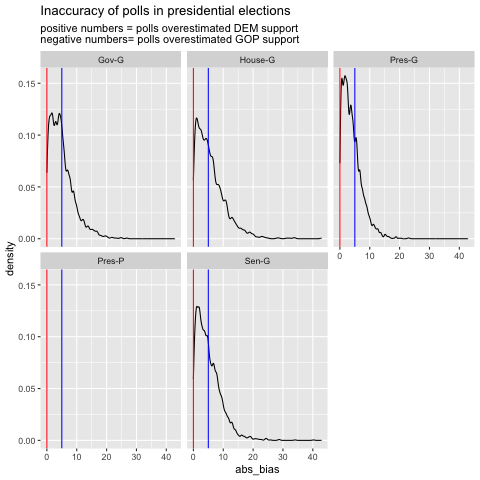

In [16]:
%%R -i df

# a basic histogram
ggplot(df) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [17]:
nyt.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.101667
House-G    3.667273
Pres-G     5.933529
Pres-P          NaN
Sen-G      4.322667
Name: abs_bias, dtype: float64

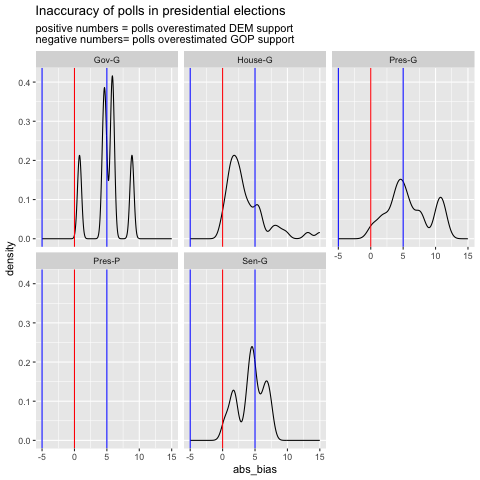

In [18]:
%%R -i nyt

# a basic histogram
ggplot(nyt) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

In [19]:
print("Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.")

Generally fine, lean democrat by about 5% in most election types. Slightly worse than the aggregate.


👉 **Jayhawk Consulting**

In [20]:
df[df.pollster == "Jayhawk Consulting Services"]

,poll_id,question_id,race_id,year,race,location,type_simple,type_detail,pollster,pollster_rating_id,methodology,partisan,polldate,samplesize,cand1_name,cand1_id,cand1_party,cand1_pct,cand2_name,cand2_id,cand2_party,cand2_pct,cand3_pct,margin_poll,electiondate,cand1_actual,cand2_actual,margin_actual,bias,rightcall,comment,abs_bias
7325,36081,49015,5495,2014,2014_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/26/14,400.0,James E. Sherow,5342,DEM,45.0,Tim Huelskamp,5335,REP,38.0,NaN,7.0,11/4/14,32.03,67.97,-35.94,42.94,0.0,for James E. Sherow,42.94
9146,56550,90986,330,2018,2018_House-G_KS-1,KS-1,House-G,House-G,Jayhawk Consulting Services,157,Live Phone,D,10/23/18,600.0,Alan LaPolice,11713,DEM,38.0,Roger Marshall,11714,REP,42.0,NaN,-4.0,11/6/18,31.85,68.15,-36.29,32.29,1.0,for Alan LaPolice,32.29


In [21]:
print("They just tell their clients that they're way ahead lol.")

They just tell their clients that they're way ahead lol.


👉 **Fox News/Beacon Research/Shaw & Co. Research**

In [22]:
fox = df[df.pollster == "Fox News/Beacon Research/Shaw & Co. Research"]

In [23]:
len(fox)

46

In [24]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [25]:
fox.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.965000
House-G    3.055000
Pres-G     3.669167
Pres-P          NaN
Sen-G      5.472222
Name: abs_bias, dtype: float64

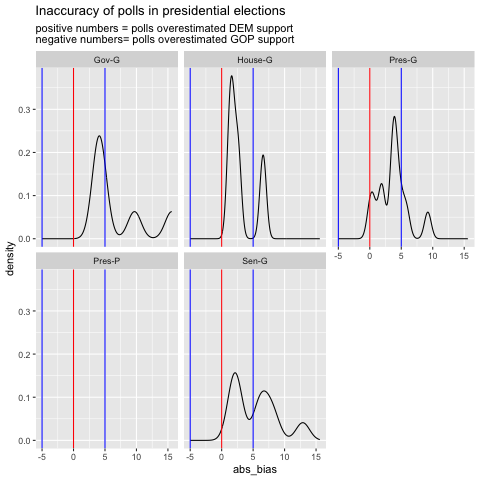

In [26]:
%%R -i fox

# a basic histogram
ggplot(fox) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

👉 **Brown University**

In [27]:
brown = df[df.pollster == "Brown University"]

In [28]:
len(brown)

12

In [30]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [29]:
brown.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G       9.006667
House-G     5.570000
Pres-G     11.080000
Pres-P           NaN
Sen-G       9.060000
Name: abs_bias, dtype: float64

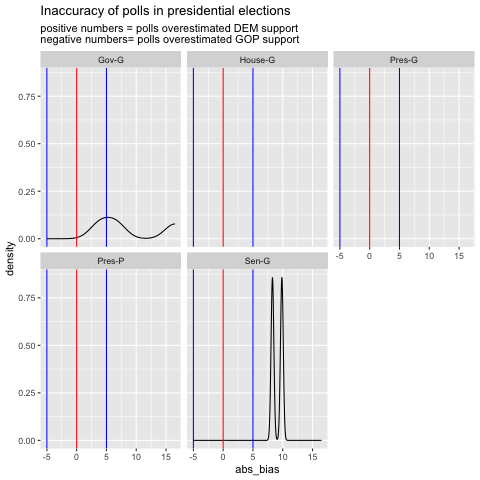

In [31]:
%%R -i brown

# a basic histogram
ggplot(brown) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

👉 **American Research Group**

In [33]:
arg = df[df.pollster == "American Research Group"]

In [34]:
len(arg)

277

In [35]:
df.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      5.098776
House-G    5.830789
Pres-G     4.081582
Pres-P          NaN
Sen-G      5.154237
Name: abs_bias, dtype: float64

In [39]:
arg.groupby('type_simple').abs_bias.mean()

type_simple
Gov-G      6.483000
House-G    5.798000
Pres-G     3.820000
Pres-P          NaN
Sen-G      3.000833
Name: abs_bias, dtype: float64

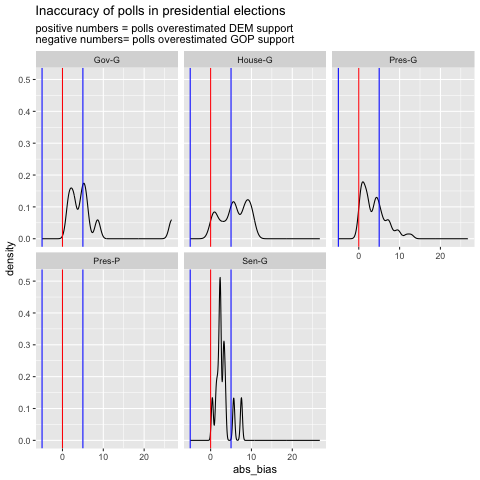

In [37]:
%%R -i arg

# a basic histogram
ggplot(arg) +
    aes(x=abs_bias) +
    geom_density(adjust=1/2) +
    facet_wrap('type_simple') +
    geom_vline(aes(xintercept=0), color='red') +
    geom_vline(aes(xintercept=5), color='blue') +
    geom_vline(aes(xintercept=-5), color='blue') +
    labs(
        title='Inaccuracy of polls in presidential elections',
        subtitle="positive numbers = polls overestimated DEM support\nnegative numbers= polls overestimated GOP support",
        )

### Question 2: Which pollsters are the most accurate? Which are the least accurate?

👉 Which pollsters are the most accurate?

👉 Which are the least accurate?

### Question 2 Reflections

👉 Write a summary paragraph explaining how you decided what constitutes “most accurate” and "least accurate"?


👉 In bullet point form, name **methodological choices** you made in the process of determining which pollsters were the most and least accurate.


👉 In bullet point form, list the **limitations** of your approach 
